# Tutorial 03: Viewing predictions

The process of viewing predictions consists basically on juxtaposing the predictions we created and the raster images. Therefore, we will need to load the rasters we used on the previous tutorials to compute the features and the predictions that we stored. Let's get started.

In [3]:
import pandas as pd
import rasterio
from matplotlib import pyplot as plt
from datetime import date

from damage.features import RasterSplitter

def plot_image(image):
    fix, ax = plt.subplots(figsize=(25, 25))
    ax.imshow(image)
    return ax

In [4]:
path = '../logs/features'
file_name = 'aleppo_64.p'
target_64 = pd.read_pickle('{}/{}'.format(path, file_name)).drop('image', axis=1)
#target = target.xs(date(2017, 2, 7), level='date')
print(target_64.shape)
file_name = 'aleppo_128.p'
target_128 = pd.read_pickle('{}/{}'.format(path, file_name)).drop('image', axis=1)
#target = target.xs(date(2017, 2, 7), level='date')
print(target_128.shape)

(262356, 5)
(65541, 5)


In [5]:
raster_path = '../data/city_rasters'
raster_file_name = 'aleppo_2016_10_19_zoom_19.tif'
raster = rasterio.open('{}/{}'.format(raster_path, raster_file_name))
raster_array = RasterSplitter._raster_to_array(raster)

In [8]:
single_date = date(2014, 5, 23)
target_64_single_date = target_64.xs(single_date, level='date')['destroyed']
target_64_destroyed = target_64_single_date.loc[target_64_single_date == 1]
target_64_non_destroyed = target_64_single_date.loc[target_64_single_date == 0]
patches_destroyed_64 = pd.DataFrame([elem[1].split('-') for elem in target_64_destroyed.index.tolist()], columns=['row', 'column']).astype(int)
patches_non_destroyed_64 = pd.DataFrame([elem[1].split('-') for elem in target_64_non_destroyed.index.tolist()], columns=['row', 'column']).astype(int)

In [9]:
single_date = date(2014, 5, 23)
target_128_single_date = target_128.xs(single_date, level='date')['destroyed']
target_128_destroyed = target_128_single_date.loc[target_128_single_date == 1]
target_128_non_destroyed = target_128_single_date.loc[target_128_single_date == 0]
patches_destroyed_128 = pd.DataFrame([elem[1].split('-') for elem in target_128_destroyed.index.tolist()], columns=['row', 'column']).astype(int)
patches_non_destroyed_128 = pd.DataFrame([elem[1].split('-') for elem in target_128_non_destroyed.index.tolist()], columns=['row', 'column']).astype(int)

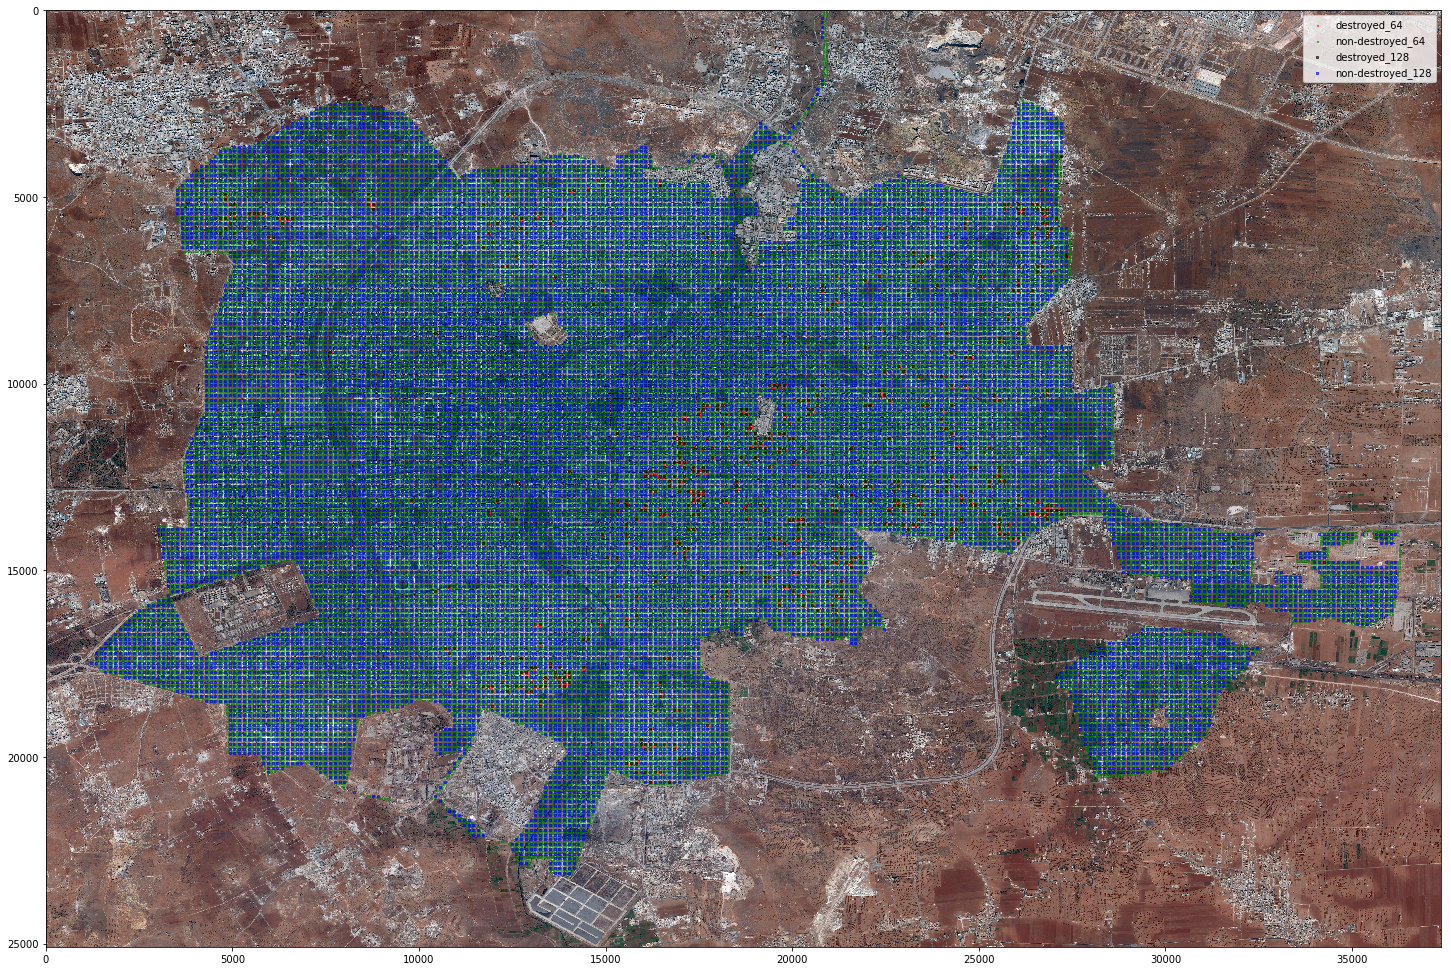

In [12]:
ax = plot_image(raster_array)
ax.scatter(patches_destroyed_64['row'], patches_destroyed_64['column'], color='r', label='destroyed_64', alpha=0.6, s=1, marker='s')
ax.scatter(patches_non_destroyed_64['row'], patches_non_destroyed_64['column'], color='g', label='non-destroyed_64', alpha=0.6, s=1, marker='s')
ax.scatter(patches_destroyed_128['row'], patches_destroyed_128['column'], color='black', label='destroyed_128', alpha=0.6, s=2, marker='s')
ax.scatter(patches_non_destroyed_128['row'], patches_non_destroyed_128['column'], color='blue', label='non-destroyed_128', alpha=0.6, s=2, marker='s')
plt.legend()
plt.savefig(f'../figures/aleppo_target_ensemble.pdf', dpi=500)